In [9]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

with h5py.File('train_catvnoncat.h5', 'r') as file:
    train_set_x = file['train_set_x'][:]
    train_set_y = file['train_set_y'][:]


with h5py.File('test_catvnoncat.h5', 'r') as file:
    test_set_x = file['test_set_x'][:]
    test_set_y = file['test_set_y'][:]



classes=np.unique(train_set_y)

m_train=train_set_x.shape[0]
m_test=test_set_x.shape[0]
num_px=train_set_x.shape[1]


print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 1)")
print ("train_set_x shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_X=train_set_x.reshape(-1,m_train)
test_set_X=test_set_x.reshape(-1,m_test)
y_train=train_set_y.reshape(1,m_train)
y_test=test_set_y.reshape(1,m_test)

train_set_X=train_set_X/255.0
test_set_X=test_set_X/255.0


Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 1)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (209,)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (50,)


In [20]:
def sigmoid(x):
    return 1/(1+np.exp(-x))


def dev_sigmoid(x):
    s=sigmoid(x)
    return s*(1-s)

In [31]:
class ShallowNetwork():
    def __init__(self, X, y, nh, ny, epochs, learning_rate=0.0001):
        self.m = X.shape[1]
        dim = X.shape[0]
        self.X = X
        self.y = y
        self.w1 = np.random.randn(nh, dim) * 0.01
        self.b1 = np.zeros((nh, 1))
        self.w2 = np.random.randn(ny, nh) * 0.01
        self.b2 = np.zeros((ny, 1))
        self.epochs = epochs
        self.learning_rate = learning_rate

    def forward(self):
        Z1 = np.dot(self.w1, self.X) + self.b1
        A1 = sigmoid(Z1)

        Z2 = np.dot(self.w2, A1) + self.b2
        A2 = sigmoid(Z2)

        cost = -np.sum((self.y * np.log(A2)) + ((1 - self.y) * np.log(1 - A2))) / self.m
        return Z1, Z2, A1, A2, cost
    

    def backward(self, A1, A2, Z1):
        dZ2 = A2 - self.y
        db2 = np.sum(dZ2, axis=1, keepdims=True) / self.m
        dw2 = np.dot(dZ2, A1.T) / self.m
        dZ1 = np.dot(self.w2.T, dZ2) * dev_sigmoid(Z1)
        dw1 = np.dot(dZ1, self.X.T) / self.m
        db1 = np.sum(dZ1, axis=1, keepdims=True) / self.m
        return dw1, dw2, db1, db2

    def main(self):
        cost_list = []
        accuracy_list=[]
        for n in range(self.epochs):
            Z1, Z2, A1, A2, cost = self.forward()
            dw1, dw2, db1, db2 = self.backward(A1, A2, Z1)
            cost_list.append(cost)
            y_pred = (A2 >= 0.5) * 1.0
            accuracy = accuracy_score(self.y.flatten(), y_pred.flatten())
            accuracy_list.append(accuracy)
            print(f'Epoch {n} - loss: {cost}, accuracy: {accuracy}')
            self.w1 -= self.learning_rate * dw1
            self.b1 -= self.learning_rate * db1
            self.w2 -= self.learning_rate * dw2
            self.b2 -= self.learning_rate * db2

        plt.plot(cost_list)
        plt.show()
        plt.plot(accuracy_list)
        plt.show()

    def predict(self, test):
        Z1 = np.dot(self.w1, test) + self.b1
        A1 = sigmoid(Z1)

        Z2 = np.dot(self.w2, A1) + self.b2
        A2 = sigmoid(Z2)
        y_pred = (A2 >= 0.5) * 1.0
        return y_pred

Epoch 0 - loss: 0.6965157410107392, accuracy: 0.3444976076555024
Epoch 1 - loss: 0.6965044987631552, accuracy: 0.3444976076555024
Epoch 2 - loss: 0.696493259360236, accuracy: 0.3444976076555024
Epoch 3 - loss: 0.6964820228000529, accuracy: 0.3444976076555024
Epoch 4 - loss: 0.6964707890806804, accuracy: 0.3444976076555024
Epoch 5 - loss: 0.6964595582001938, accuracy: 0.3444976076555024
Epoch 6 - loss: 0.6964483301566696, accuracy: 0.3444976076555024
Epoch 7 - loss: 0.696437104948187, accuracy: 0.3444976076555024
Epoch 8 - loss: 0.6964258825728254, accuracy: 0.3444976076555024
Epoch 9 - loss: 0.6964146630286668, accuracy: 0.3444976076555024
Epoch 10 - loss: 0.6964034463137942, accuracy: 0.3444976076555024
Epoch 11 - loss: 0.6963922324262928, accuracy: 0.3444976076555024
Epoch 12 - loss: 0.6963810213642481, accuracy: 0.3444976076555024
Epoch 13 - loss: 0.6963698131257486, accuracy: 0.3444976076555024
Epoch 14 - loss: 0.6963586077088838, accuracy: 0.3444976076555024
Epoch 15 - loss: 0.696

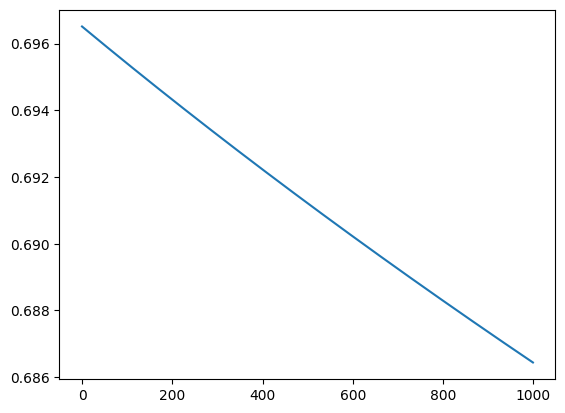

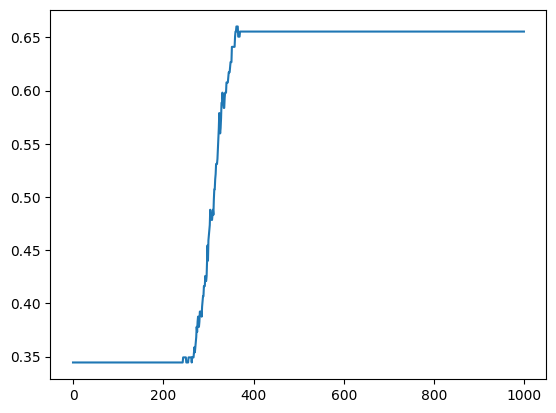

In [34]:
sn=ShallowNetwork(train_set_X,y_train,10,1,1000)
sn.main()